# Helsinki Bikes Project

"Conclusion:
In this article, we looked at the Helsinki city bike system through the lens of descriptive statistics. This article barely scratched the surface of all the possible analyses that can be performed on the underlying dataset. Those interested in their own exploration can find the dataset on Kaggle"

**I will compliment the descriptive analysis with a machine learning model to predict rides**

# Data exploration & cleaning

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## File 1 - Bike Trips

In [2]:
file1 = pd.read_csv('database.csv', low_memory=False)

In [3]:
file1.shape

(12157458, 14)

In [4]:
file1.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [5]:
file1.dtypes

departure                  object
return                     object
departure_id               object
departure_name             object
return_id                  object
return_name                object
distance (m)              float64
duration (sec.)           float64
avg_speed (km/h)          float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
Air temperature (degC)    float64
dtype: object

In [6]:
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [8]:
for col in file1.columns:
    print(col)
    print(len(file1[col].unique()))

departure
8359376
return
8376121
departure_id
671
departure_name
347
return_id
558
return_name
348
distance (m)
21292
duration (sec.)
45084
avg_speed (km/h)
2300804
departure_latitude
347
departure_longitude
347
return_latitude
348
return_longitude
348
Air temperature (degC)
347


In [9]:
#Adding 4 new columns, splitting departure and return columns into 'departure_date', 'departure_time', 'return_date', 'return_time'

file1['departure'] = pd.to_datetime(file1['departure'])

file1['departure_date'] = file1['departure'].dt.date
file1['departure_time'] = file1['departure'].dt.time

file1['return'] = pd.to_datetime(file1['return'])

file1['return_date'] = file1['return'].dt.date
file1['return_time'] = file1['return'].dt.time

file1

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [10]:
file1.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
departure_date                0
departure_time                0
return_date                   0
return_time                   0
dtype: int64

In [11]:
#rename columns
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)', 'departure_date',
       'departure_time', 'return_date', 'return_time'],
      dtype='object')

In [12]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

original_list = ['departure', 'return', 'departure_id', 'departure_name', 'return_id',
                 'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
                 'departure_latitude', 'departure_longitude', 'return_latitude',
                 'return_longitude', 'Air temperature (degC)', 'departure_date',
                 'departure_time', 'return_date', 'return_time']

snake_case_list = [to_snake_case(item) for item in original_list]
print(snake_case_list)


['departure', 'return', 'departure_id', 'departure_name', 'return_id', 'return_name', 'distance_(m)', 'duration_(sec.)', 'avg_speed_(km/h)', 'departure_latitude', 'departure_longitude', 'return_latitude', 'return_longitude', 'air_temperature_(degc)', 'departure_date', 'departure_time', 'return_date', 'return_time']


In [13]:
file1.columns = snake_case_list
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [14]:
#Dropping duplicates
file1 = file1.drop_duplicates()
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [15]:
file1.isna().mean()*100

departure                 0.000000
return                    0.000000
departure_id              0.000000
departure_name            0.000000
return_id                 0.000000
return_name               0.000000
distance_(m)              0.000000
duration_(sec.)           0.000000
avg_speed_(km/h)          0.029201
departure_latitude        0.000000
departure_longitude       0.000000
return_latitude           0.000008
return_longitude          0.000008
air_temperature_(degc)    0.130802
departure_date            0.000000
departure_time            0.000000
return_date               0.000000
return_time               0.000000
dtype: float64

In [16]:
m_speed = file1['avg_speed_(km/h)'].mean()
m_speed

0.3355585469906318

In [17]:
m_temp = file1['air_temperature_(degc)'].mean()
m_temp

15.650438994217291

In [18]:
file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/3854245321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/3854245321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)


In [19]:
file1.isna().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance_(m)              0
duration_(sec.)           0
avg_speed_(km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           1
return_longitude          1
air_temperature_(degc)    0
departure_date            0
departure_time            0
return_date               0
return_time               0
dtype: int64

In [20]:
f1_cleaned = file1.dropna()

In [21]:
f1_cleaned.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [22]:
f1_cleaned.shape

(12157291, 18)

In [23]:
df = f1_cleaned

In [24]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [25]:
df['month'] = df['departure'].dt.month
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2438391164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['departure'].dt.month


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10


In [26]:
df['year'] = df['departure'].dt.year
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/3852519227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['departure'].dt.year


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017


In [27]:
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['weekday'] = df['departure_date'].dt.day_name()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/1082588385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_date'] = pd.to_datetime(df['departure_date'])
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/1082588385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['departure_date'].dt.day_name()


In [28]:
pd.set_option('display.max_columns', None)
df['day'] = df['departure'].dt.day
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2780713555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['departure'].dt.day


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020,Monday,23
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020,Monday,23
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020,Monday,23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020,Monday,23
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020,Monday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017,Monday,30
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017,Monday,30
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017,Monday,30
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017,Monday,30


In [29]:
df = df[df['year'] != 2016]

In [31]:
target_month = 3
df = df[df['month'] != target_month]

In [32]:
df.shape

(11707844, 22)

In [33]:
df['year'].value_counts().sort_values()

2017    1606741
2020    3087714
2018    3225834
2019    3787555
Name: year, dtype: int64

In [ ]:
#Decided to drop 2017 as there is fewer data than the other years

In [34]:
df = df[df['year'] != 2017]

In [36]:
df['year'].value_counts()

2019    3787555
2018    3225834
2020    3087714
Name: year, dtype: int64

In [37]:
df['month'].value_counts().sort_values() #The city bike season starts on 1 April and ends on 31 October.

10     769220
4      902022
9     1227823
5     1694041
7     1752586
8     1860513
6     1894898
Name: month, dtype: int64

In [38]:
df['day'].value_counts().sort_values()

31    199565
2     293678
4     303146
22    304466
5     309651
11    311195
1     314277
12    314675
3     315048
29    315754
30    318103
6     320067
8     324133
20    325867
21    328805
13    330907
23    333337
7     333409
26    335082
9     337056
24    337254
14    338810
28    339297
19    342189
16    346894
15    347772
25    348969
10    353145
27    358395
17    358619
18    361538
Name: day, dtype: int64

In [39]:
df['day'].nunique()

31

In [40]:
pivot_table = df.pivot_table(
    index=['year', 'month', 'day'],
    aggfunc='size',
    fill_value=0
)

pivot_table

year  month  day
2018  4      3       666
             4      1648
             5      2625
             6      3474
             7      4347
                    ... 
2020  10     27     4765
             28     6722
             29     7198
             30     6733
             31     4775
Length: 640, dtype: int64

In [41]:
days_per_year = df.groupby('year')['day'].count()
days_per_month = df.groupby(['year', 'month'])['day'].count()

print("Days per Year:")
print(days_per_year)

print("\nDays per Month:")
print(days_per_month)


Days per Year:
year
2018    3225834
2019    3787555
2020    3087714
Name: day, dtype: int64

Days per Month:
year  month
2018  4        215963
      5        637263
      6        563511
      7        568042
      8        601208
      9        388912
      10       250935
2019  4        406580
      5        599653
      6        715131
      7        666321
      8        689484
      9        450038
      10       260348
2020  4        279479
      5        457125
      6        616256
      7        518223
      8        569821
      9        388873
      10       257937
Name: day, dtype: int64


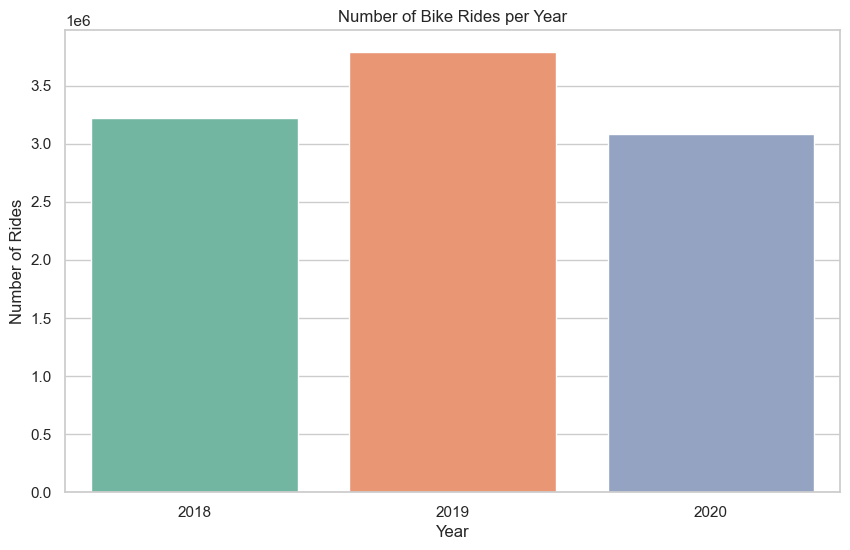

In [44]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', palette='Set2')
plt.title('Number of Bike Rides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.show()

## The rides decrease in 2020 might have been caused by the impact of COVID-19

### Could it also be weather related? other reasons?

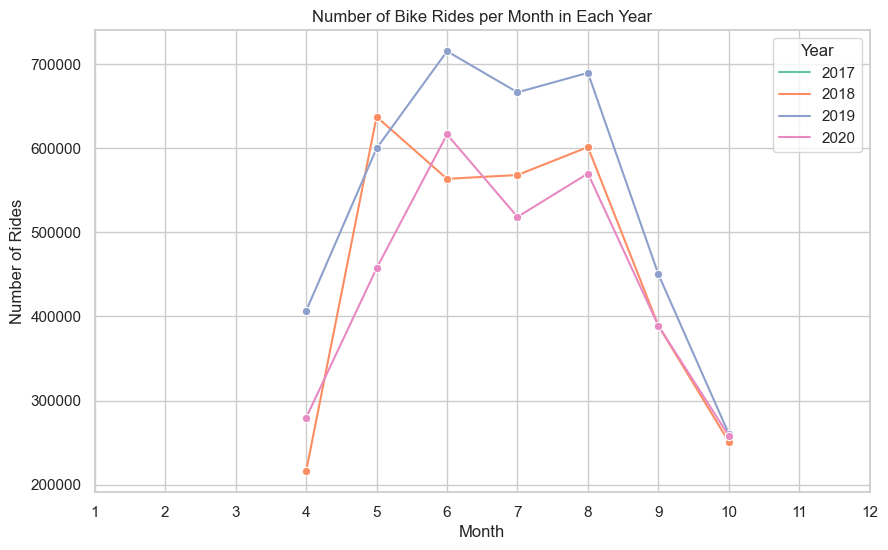

In [45]:
ride_counts = df.groupby(['year', 'month']).size().reset_index(name='ride_count')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=ride_counts, x='month', y='ride_count', hue='year', hue_order=[2017, 2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Number of Bike Rides per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title ='Year')

plt.show()

## The higher number of rides start increasing in May and start going down in August
### This can be weather related, we will look into this correlation later in the analysis.

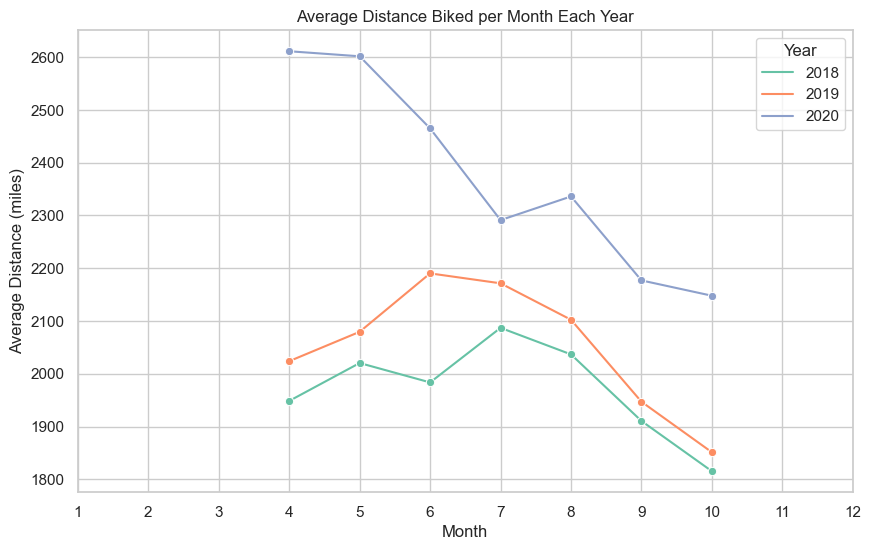

In [47]:
avg_distance_per_month = df.groupby(['year', 'month'])['distance_(m)'].mean().reset_index()

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=avg_distance_per_month, x='month', y='distance_(m)', hue='year', hue_order=[2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Average Distance Biked per Month Each Year')
plt.xlabel('Month')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title='Year')

plt.show()

## Surprisingly, the longest rides were recorded in 2020
### How come?

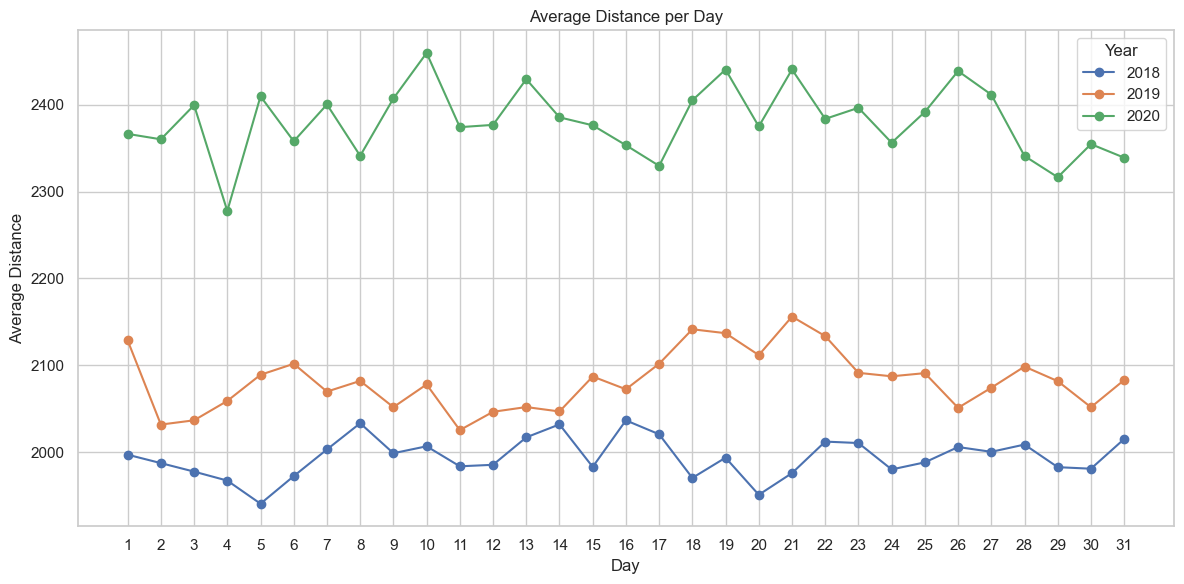

In [49]:
plt.figure(figsize=(12, 6))

# Filter data for each year
for year in [2018, 2019, 2020]:
    avg_distance_per_year = df[df['year'] == year].groupby('day')['distance_(m)'].mean()

    plt.plot(avg_distance_per_year.index, avg_distance_per_year.values, marker='o', label=str(year))

plt.title('Average Distance per Day')
plt.xlabel('Day')
plt.ylabel('Average Distance')
plt.xticks(avg_distance_per_year.index)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

## Average distance per day in 2018 and 2019 are similar, under 2,2 km, in 2020, the average distance increased.

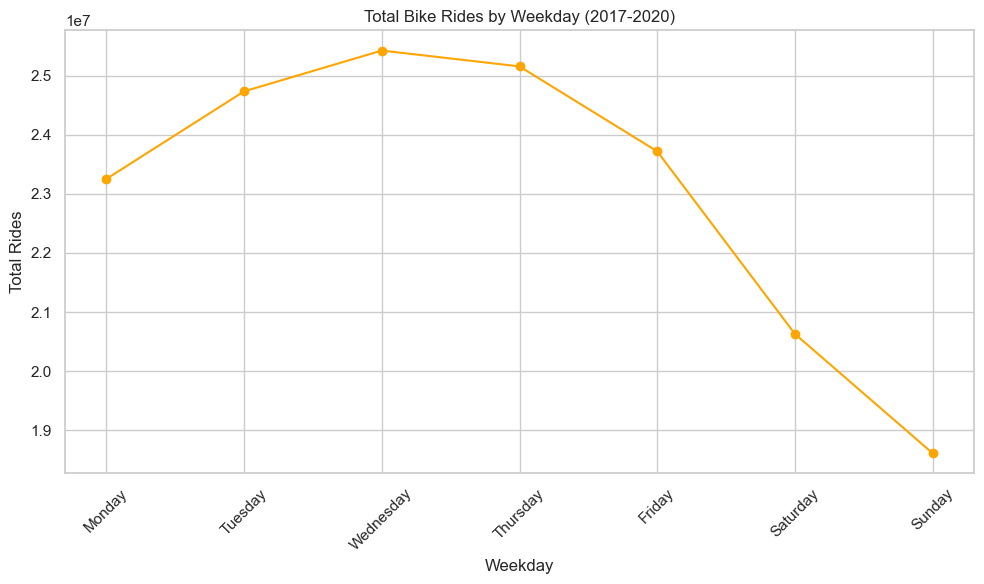

In [50]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_total_rides = df.groupby('weekday')['day'].sum().reindex(weekday_order)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the line plot
weekday_total_rides.plot(marker='o', color='orange')

plt.title('Total Bike Rides by Weekday (2017-2020)')
plt.xlabel('Weekday')
plt.ylabel('Total Rides')
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)
plt.tight_layout()

plt.show()

## On average, most rides happened on Wednesdays and Thursdays

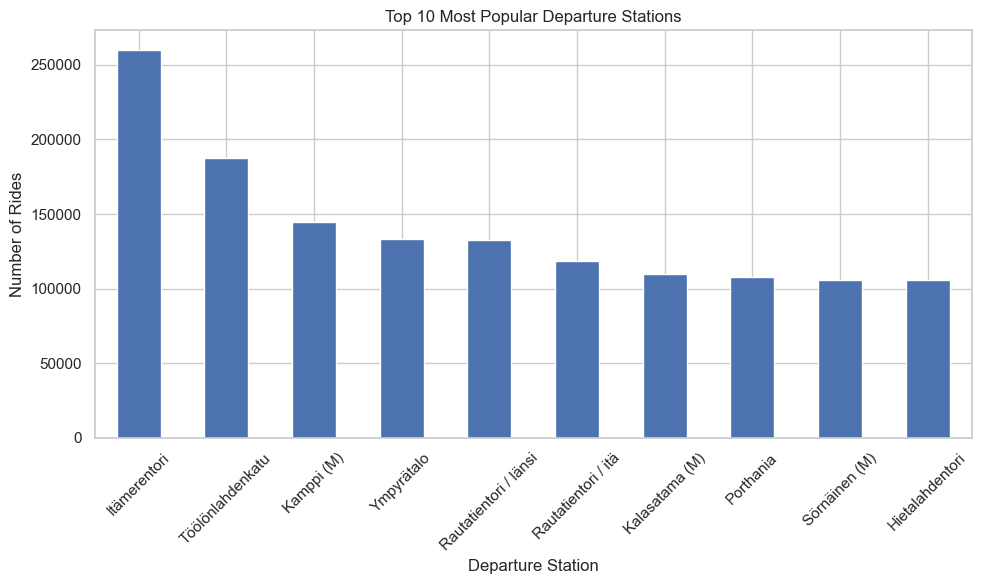

In [51]:
departure_counts = df['departure_name'].value_counts()

# Number of top stations to display
top_n = 10

# Select the top N stations
top_departures = departure_counts.head(top_n)

# Plot the count of rides from the top departure stations
plt.figure(figsize=(10, 6))
top_departures.plot(kind='bar')
plt.title(f'Top {top_n} Most Popular Departure Stations')
plt.xlabel('Departure Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Itämerentori is the most popular departure destination
### Why?

### Is this close to a university? train station? 

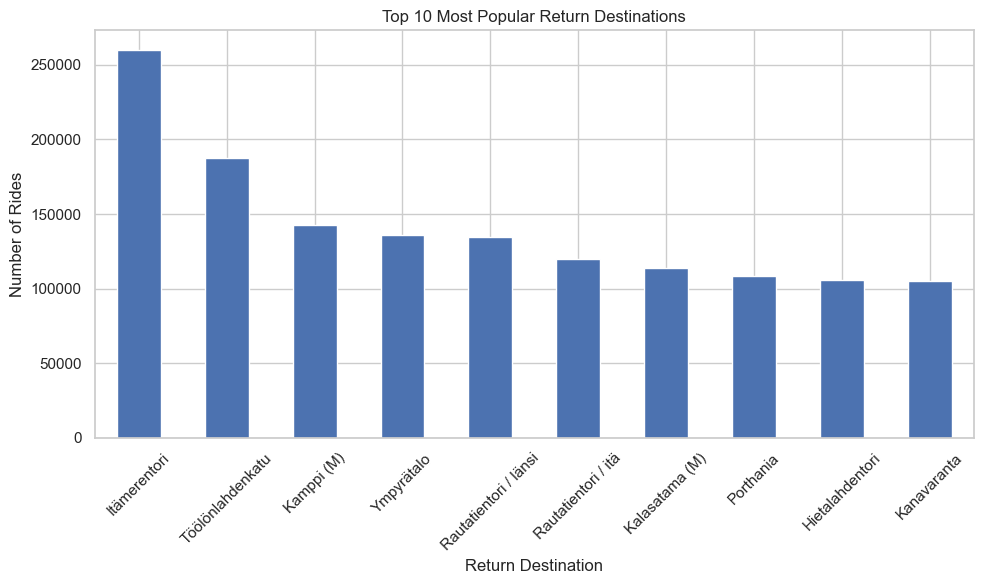

In [52]:
return_counts = df['return_name'].value_counts()

# Number of top destinations to display
top_n = 10

# Select the top N return destinations
top_returns = return_counts.head(top_n)

# Plot the count of rides to the top return destinations
plt.figure(figsize=(10, 6))
top_returns.plot(kind='bar')
plt.title(f'Top {top_n} Most Popular Return Destinations')
plt.xlabel('Return Destination')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Itämerentori is also the most popular return destination. 
### Why?

In [56]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day
41370,2020-04-01 00:04:08,2020-04-01 00:21:27,62,Länsisatamankatu,62.0,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,00:04:08,2020-04-01,00:21:27,4,2020,Wednesday,1
41371,2020-04-01 00:12:31,2020-04-01 00:21:34,149,Toinen linja,16.0,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,00:12:31,2020-04-01,00:21:34,4,2020,Wednesday,1
41372,2020-04-01 00:16:46,2020-04-01 00:46:09,118,Fleminginkatu,105.0,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,00:16:46,2020-04-01,00:46:09,4,2020,Wednesday,1
41373,2020-04-01 00:19:29,2020-04-01 00:30:13,17,Varsapuistikko,13.0,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,00:19:29,2020-04-01,00:30:13,4,2020,Wednesday,1
41374,2020-04-01 00:20:19,2020-04-01 00:46:14,226,Lepolantie,112.0,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,00:20:19,2020-04-01,00:46:14,4,2020,Wednesday,1


In [57]:
columns_to_drop = ['departure_id', 'return_id']
df = df.drop(columns=columns_to_drop)

In [58]:
df.shape

(10101103, 20)

In [60]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')
df['departure_hour'] = df['departure_time'].dt.hour

In [61]:
df['departure_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

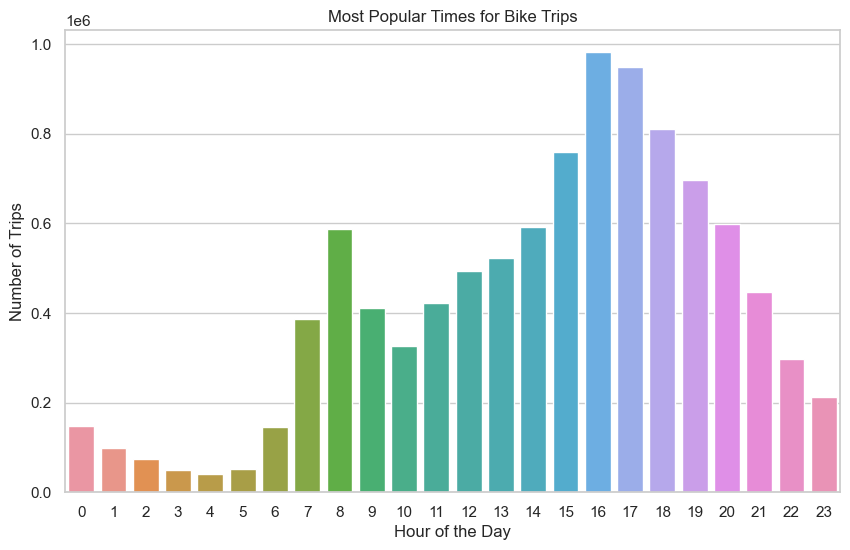

In [62]:
hour_counts = df['departure_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Most Popular Times for Bike Trips')
plt.xticks(hour_counts.index)
plt.show()

## The most popular riding times are in the morning, at 8am, and then between 16:00 and 18:00

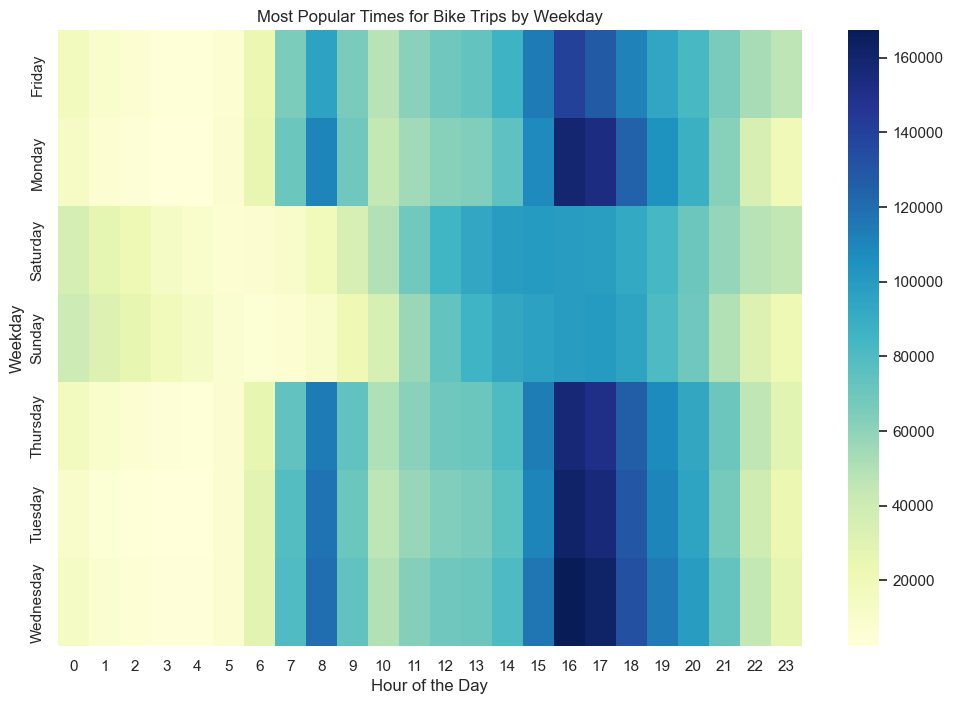

In [63]:
import datetime

hour_weekday_counts = df.groupby(['weekday', 'departure_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(hour_weekday_counts, cmap='YlGnBu', annot=False, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.title('Most Popular Times for Bike Trips by Weekday')
plt.show()

## Here we can see that during weekdays, the most popular times are from 16:00, but not on weekends.
### We could here make an assumption that users of the bikes use them mostly to commute from work.
### We will look into the correlation between hour/weekday and location.

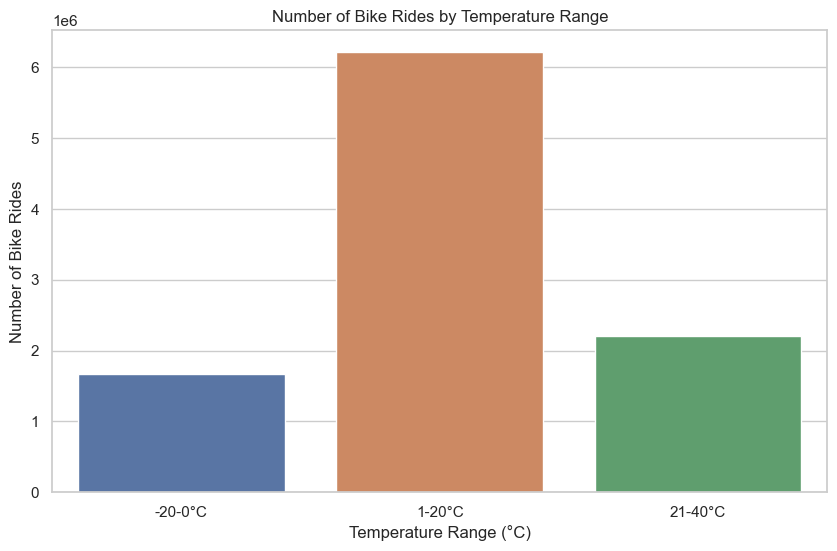

In [64]:
temperature_bins = [-20, 10, 20, 40]
bin_labels = ['-20-0°C', '1-20°C', '21-40°C']

# Bin the temperature values
df['temperature_range'] = pd.cut(df['air_temperature_(degc)'], bins=temperature_bins, labels=bin_labels)

# Group data by temperature range and count the number of bike rides
grouped_data = df.groupby('temperature_range').size().reset_index(name='bike_rides_count')

# Plot using Seaborn (you can also use Matplotlib directly)
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='bike_rides_count', data=grouped_data)
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Number of Bike Rides')
plt.title('Number of Bike Rides by Temperature Range')
plt.show()

## Most rides happen when the temperature is above 0

# ------------------------------------------------------------------------------------------

## File 2 - Weather

In [65]:
file2 = pd.read_csv('weather.csv')
file2

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2016,1,1,00:00,UTC,-1.0,-1,-4.6
1,2016,1,2,00:00,UTC,-1.0,-1,-7.0
2,2016,1,3,00:00,UTC,3.2,-1,-8.7
3,2016,1,4,00:00,UTC,-1.0,4,-11.2
4,2016,1,5,00:00,UTC,0.6,4,-17.6
...,...,...,...,...,...,...,...,...
1822,2020,12,27,00:00,UTC,0.4,-1,1.1
1823,2020,12,28,00:00,UTC,4.2,-1,0.7
1824,2020,12,29,00:00,UTC,6.9,-1,1.1
1825,2020,12,30,00:00,UTC,2.9,-1,3.0


In [66]:
file2.columns

Index(['Year', 'm', 'd', 'Time', 'Time zone', 'Precipitation amount (mm)',
       'Snow depth (cm)', 'Air temperature (degC)'],
      dtype='object')

In [67]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

column_names = [
    "Year", "m", "d", "Time", "Time zone", 
    "Precipitation amount (mm)", "Snow depth (cm)", "Air temperature (degC)"
]

snake_case_column_names = [to_snake_case(column) for column in column_names]
print(snake_case_column_names)


['year', 'm', 'd', 'time', 'time_zone', 'precipitation_amount_(mm)', 'snow_depth_(cm)', 'air_temperature_(degc)']


In [68]:
file2.columns = snake_case_column_names

In [69]:
file2

,year,m,d,time,time_zone,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,00:00,UTC,-1.0,-1,-4.6
1,2016,1,2,00:00,UTC,-1.0,-1,-7.0
2,2016,1,3,00:00,UTC,3.2,-1,-8.7
3,2016,1,4,00:00,UTC,-1.0,4,-11.2
4,2016,1,5,00:00,UTC,0.6,4,-17.6
...,...,...,...,...,...,...,...,...
1822,2020,12,27,00:00,UTC,0.4,-1,1.1
1823,2020,12,28,00:00,UTC,4.2,-1,0.7
1824,2020,12,29,00:00,UTC,6.9,-1,1.1
1825,2020,12,30,00:00,UTC,2.9,-1,3.0


In [70]:
file2.drop(columns=['time','time_zone'], inplace=True)

In [71]:
file2

,year,m,d,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,-1.0,-1,-4.6
1,2016,1,2,-1.0,-1,-7.0
2,2016,1,3,3.2,-1,-8.7
3,2016,1,4,-1.0,4,-11.2
4,2016,1,5,0.6,4,-17.6
...,...,...,...,...,...,...
1822,2020,12,27,0.4,-1,1.1
1823,2020,12,28,4.2,-1,0.7
1824,2020,12,29,6.9,-1,1.1
1825,2020,12,30,2.9,-1,3.0


In [72]:
file2.rename(columns={'m': 'month', 'd': 'day'}, inplace=True)
file2

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)
0,2016,1,1,-1.0,-1,-4.6
1,2016,1,2,-1.0,-1,-7.0
2,2016,1,3,3.2,-1,-8.7
3,2016,1,4,-1.0,4,-11.2
4,2016,1,5,0.6,4,-17.6
...,...,...,...,...,...,...
1822,2020,12,27,0.4,-1,1.1
1823,2020,12,28,4.2,-1,0.7
1824,2020,12,29,6.9,-1,1.1
1825,2020,12,30,2.9,-1,3.0


In [73]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])
file2

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined
0,2016,1,1,-1.0,-1,-4.6,2016-01-01
1,2016,1,2,-1.0,-1,-7.0,2016-01-02
2,2016,1,3,3.2,-1,-8.7,2016-01-03
3,2016,1,4,-1.0,4,-11.2,2016-01-04
4,2016,1,5,0.6,4,-17.6,2016-01-05
...,...,...,...,...,...,...,...
1822,2020,12,27,0.4,-1,1.1,2020-12-27
1823,2020,12,28,4.2,-1,0.7,2020-12-28
1824,2020,12,29,6.9,-1,1.1,2020-12-29
1825,2020,12,30,2.9,-1,3.0,2020-12-30


In [74]:
file2.isna().sum()

year                         0
month                        0
day                          0
precipitation_amount_(mm)    0
snow_depth_(cm)              0
air_temperature_(degc)       0
date_combined                0
dtype: int64

In [75]:
file2 = file2[file2['year'] != 2016]

In [76]:
file2['date_combined'] = file2['date_combined'].astype('object')
file2.dtypes

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/143330436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['date_combined'] = file2['date_combined'].astype('object')


year                           int64
month                          int64
day                            int64
precipitation_amount_(mm)    float64
snow_depth_(cm)               object
air_temperature_(degc)       float64
date_combined                 object
dtype: object

In [77]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])

monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
yearly_avg = file2.groupby(file2['year']).mean()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2372593894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2372593894.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2372593894.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean i

In [78]:
file2 = file2[file2['year'] != 2017]

In [79]:
file2.dtypes

year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)           float64
snow_depth_(cm)                      object
air_temperature_(degc)              float64
date_combined                datetime64[ns]
dtype: object

In [80]:
file2['snow_depth_(cm)'] = pd.to_numeric(file2['snow_depth_(cm)'], errors='coerce')
file2['snow_depth_(cm)'] = file2['snow_depth_(cm)'].astype(float)

In [81]:
file2.dtypes

year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)           float64
snow_depth_(cm)                     float64
air_temperature_(degc)              float64
date_combined                datetime64[ns]
dtype: object

In [82]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])

monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
yearly_avg = file2.groupby(file2['year']).mean()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2372593894.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = file2.groupby(file2['date_combined'].dt.to_period('M')).mean()
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/2372593894.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = file2.groupby(file2['year']).mean()


In [83]:
pivot_monthly_precipitation = file2.pivot_table(values='precipitation_amount_(mm)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

pivot_monthly_snow_depth = file2.pivot_table(values='snow_depth_(cm)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

pivot_monthly_air_temperature = file2.pivot_table(values='air_temperature_(degc)', index=file2['date_combined'].dt.month, columns=file2['date_combined'].dt.year, aggfunc='mean')

In [84]:
pivot_monthly_precipitation #avg

date_combined,2018,2019,2020
date_combined,,,
1,0.970968,2.032258,1.322581
2,0.542857,1.378571,2.320690
3,0.119355,1.051613,1.074194
4,0.920000,-0.660000,0.800000
5,-0.638710,1.448387,1.141935
6,0.676667,-0.213333,1.750000
7,0.683871,1.683871,2.264516
8,0.983871,2.038710,1.893548
9,1.716667,2.250000,1.240000


In [85]:
file2.head()

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined
731,2018,1,1,4.5,3.0,1.7,2018-01-01
732,2018,1,2,-1.0,-1.0,4.3,2018-01-02
733,2018,1,3,0.9,-1.0,3.2,2018-01-03
734,2018,1,4,2.7,-1.0,2.8,2018-01-04
735,2018,1,5,3.9,-1.0,4.0,2018-01-05


In [86]:

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn/Fall'

# Apply the function to create a new 'season' column
file2['season'] = file2['month'].apply(get_season)

file2.head()

,year,month,day,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc),date_combined,season
731,2018,1,1,4.5,3.0,1.7,2018-01-01,Winter
732,2018,1,2,-1.0,-1.0,4.3,2018-01-02,Winter
733,2018,1,3,0.9,-1.0,3.2,2018-01-03,Winter
734,2018,1,4,2.7,-1.0,2.8,2018-01-04,Winter
735,2018,1,5,3.9,-1.0,4.0,2018-01-05,Winter


In [87]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 731 to 1826
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       1096 non-null   int64         
 1   month                      1096 non-null   int64         
 2   day                        1096 non-null   int64         
 3   precipitation_amount_(mm)  1096 non-null   float64       
 4   snow_depth_(cm)            1091 non-null   float64       
 5   air_temperature_(degc)     1096 non-null   float64       
 6   date_combined              1096 non-null   datetime64[ns]
 7   season                     1096 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 77.1+ KB


In [88]:
file2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1096.0,2019.000912,0.817055,2018.0,2018.0,2019.0,2020.0,2020.0
month,1096.0,6.521898,3.450561,1.0,4.0,7.0,10.0,12.0
day,1096.0,15.732664,8.805388,1.0,8.0,16.0,23.0,31.0
precipitation_amount_(mm),1096.0,1.240511,4.273553,-1.0,-1.0,-1.0,1.6,50.2
snow_depth_(cm),1091.0,1.657195,7.229894,-1.0,-1.0,-1.0,-1.0,46.0
air_temperature_(degc),1096.0,7.842336,8.147309,-16.5,1.8,6.7,15.1,26.4


/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_51371/1400057165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(file2.corr(), annot = True, cmap= 'viridis', fmt= '.1f');


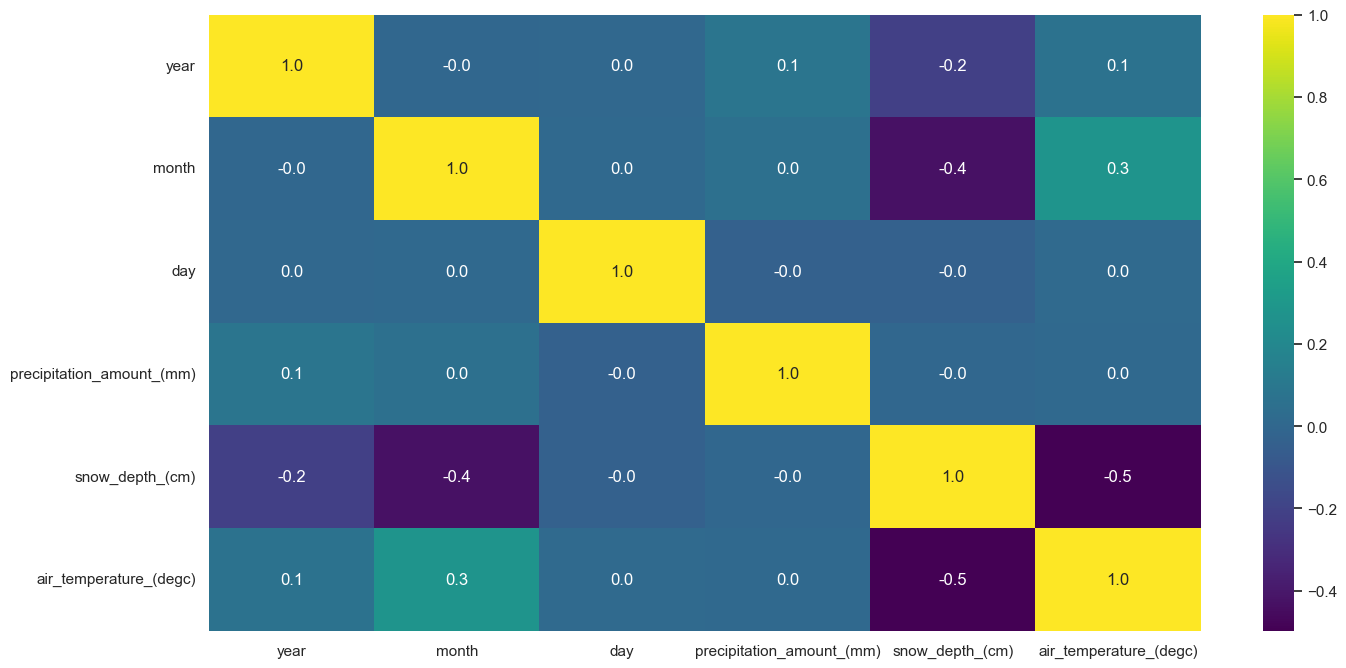

In [89]:
plt.figure(figsize= (16, 8))
sns.heatmap(file2.corr(), annot = True, cmap= 'viridis', fmt= '.1f');

# Merged datasets

# ----------------------------------------------------------------------------------------

In [90]:
print(df['departure_date'].nunique())
print(file2['date_combined'].nunique())

640
1096


In [91]:
print(df.columns)
print(file2.columns)

Index(['departure', 'return', 'departure_name', 'return_name', 'distance_(m)',
       'duration_(sec.)', 'avg_speed_(km/h)', 'departure_latitude',
       'departure_longitude', 'return_latitude', 'return_longitude',
       'air_temperature_(degc)', 'departure_date', 'departure_time',
       'return_date', 'return_time', 'month', 'year', 'weekday', 'day',
       'departure_hour', 'temperature_range'],
      dtype='object')
Index(['year', 'month', 'day', 'precipitation_amount_(mm)', 'snow_depth_(cm)',
       'air_temperature_(degc)', 'date_combined', 'season'],
      dtype='object')


In [92]:
df = df.rename(columns = {'departure_date':'date_combined'})  
df.columns

Index(['departure', 'return', 'departure_name', 'return_name', 'distance_(m)',
       'duration_(sec.)', 'avg_speed_(km/h)', 'departure_latitude',
       'departure_longitude', 'return_latitude', 'return_longitude',
       'air_temperature_(degc)', 'date_combined', 'departure_time',
       'return_date', 'return_time', 'month', 'year', 'weekday', 'day',
       'departure_hour', 'temperature_range'],
      dtype='object')

In [93]:
merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

(10101103, 29)

In [94]:
df['date_combined'] = pd.to_datetime(df['date_combined'])
file2['date_combined'] = pd.to_datetime(file2['date_combined'])

merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

(10101103, 29)

In [95]:
merged_df.head()

,departure,return,departure_name,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,month_x,year_x,weekday,day_x,departure_hour,temperature_range,year_y,month_y,day_y,precipitation_amount_(mm),snow_depth_(cm),air_temperature_(degc)_y,season
0,2020-04-01 00:04:08,2020-04-01 00:21:27,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,1900-01-01 00:04:08,2020-04-01,00:21:27,4,2020,Wednesday,1,0,-20-0°C,2020,4,1,0.3,-1.0,4.1,Spring
1,2020-04-01 00:12:31,2020-04-01 00:21:34,Toinen linja,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,1900-01-01 00:12:31,2020-04-01,00:21:34,4,2020,Wednesday,1,0,-20-0°C,2020,4,1,0.3,-1.0,4.1,Spring
2,2020-04-01 00:16:46,2020-04-01 00:46:09,Fleminginkatu,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,1900-01-01 00:16:46,2020-04-01,00:46:09,4,2020,Wednesday,1,0,-20-0°C,2020,4,1,0.3,-1.0,4.1,Spring
3,2020-04-01 00:19:29,2020-04-01 00:30:13,Varsapuistikko,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,1900-01-01 00:19:29,2020-04-01,00:30:13,4,2020,Wednesday,1,0,-20-0°C,2020,4,1,0.3,-1.0,4.1,Spring
4,2020-04-01 00:20:19,2020-04-01 00:46:14,Lepolantie,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,1900-01-01 00:20:19,2020-04-01,00:46:14,4,2020,Wednesday,1,0,-20-0°C,2020,4,1,0.3,-1.0,4.1,Spring


In [96]:
merged_df.isna().sum()

departure                        0
return                           0
departure_name                   0
return_name                      0
distance_(m)                     0
duration_(sec.)                  0
avg_speed_(km/h)                 0
departure_latitude               0
departure_longitude              0
return_latitude                  0
return_longitude                 0
air_temperature_(degc)_x         0
date_combined                    0
departure_time                   0
return_date                      0
return_time                      0
month_x                          0
year_x                           0
weekday                          0
day_x                            0
departure_hour                   0
temperature_range                0
year_y                           0
month_y                          0
day_y                            0
precipitation_amount_(mm)        0
snow_depth_(cm)              32598
air_temperature_(degc)_y         0
season              

In [97]:
merged_df.dtypes

departure                    datetime64[ns]
return                       datetime64[ns]
departure_name                       object
return_name                          object
distance_(m)                        float64
duration_(sec.)                     float64
avg_speed_(km/h)                    float64
departure_latitude                  float64
departure_longitude                 float64
return_latitude                     float64
return_longitude                    float64
air_temperature_(degc)_x            float64
date_combined                datetime64[ns]
departure_time               datetime64[ns]
return_date                          object
return_time                          object
month_x                               int64
year_x                                int64
weekday                              object
day_x                                 int64
departure_hour                        int64
temperature_range                  category
year_y                          

In [98]:
columns_to_drop = ['month_x', 'year_x','day_x','air_temperature_(degc)_y']
merged_df = merged_df.drop(columns_to_drop, axis=1)

In [99]:
merged_df.shape

(10101103, 25)

In [100]:
merged_df['snow_depth_(cm)'].isna().sum()

32598

In [101]:
#replacing nulls with the mean

snow_depth_mean = merged_df['snow_depth_(cm)'].mean()
merged_df['snow_depth_(cm)'] = merged_df['snow_depth_(cm)'].fillna(snow_depth_mean)

In [102]:
merged_df.isna().sum()

departure                    0
return                       0
departure_name               0
return_name                  0
distance_(m)                 0
duration_(sec.)              0
avg_speed_(km/h)             0
departure_latitude           0
departure_longitude          0
return_latitude              0
return_longitude             0
air_temperature_(degc)_x     0
date_combined                0
departure_time               0
return_date                  0
return_time                  0
weekday                      0
departure_hour               0
temperature_range            0
year_y                       0
month_y                      0
day_y                        0
precipitation_amount_(mm)    0
snow_depth_(cm)              0
season                       0
dtype: int64

## Spitting into numerical and categorical

In [103]:
merged_df['time_in_minutes'] = merged_df['duration_(sec.)'] / 60

In [104]:
merged_df.shape

(10101103, 26)

In [105]:
merged_df = merged_df.rename(columns={'year_y': 'year', 'month_y': 'month', 'day_y':'day','time_in_minutes':'trip_duration_min'})
merged_df.head()

,departure,return,departure_name,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,weekday,departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min
0,2020-04-01 00:04:08,2020-04-01 00:21:27,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,1900-01-01 00:04:08,2020-04-01,00:21:27,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,17.300000
1,2020-04-01 00:12:31,2020-04-01 00:21:34,Toinen linja,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,1900-01-01 00:12:31,2020-04-01,00:21:34,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,8.966667
2,2020-04-01 00:16:46,2020-04-01 00:46:09,Fleminginkatu,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,1900-01-01 00:16:46,2020-04-01,00:46:09,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,18.016667
3,2020-04-01 00:19:29,2020-04-01 00:30:13,Varsapuistikko,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,1900-01-01 00:19:29,2020-04-01,00:30:13,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,10.650000
4,2020-04-01 00:20:19,2020-04-01 00:46:14,Lepolantie,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,1900-01-01 00:20:19,2020-04-01,00:46:14,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,25.866667


In [117]:
trip_duration_yearly_stats = merged_df.groupby('year')['trip_duration_min'].agg(['mean', 'median', 'count']).reset_index()
trip_duration_yearly_stats

,year,mean,median,count
0,2018,14.862471,9.366667,3225834
1,2019,15.505669,9.266667,3787555
2,2020,16.713952,10.666667,3087714


In [118]:
merged_df.dtypes

departure                    datetime64[ns]
return                       datetime64[ns]
departure_name                       object
return_name                          object
distance_(m)                        float64
duration_(sec.)                     float64
avg_speed_(km/h)                    float64
departure_latitude                  float64
departure_longitude                 float64
return_latitude                     float64
return_longitude                    float64
air_temperature_(degc)_x            float64
date_combined                datetime64[ns]
departure_time                       object
return_date                          object
return_time                          object
weekday                              object
departure_hour                        int64
temperature_range                  category
year                                  int64
month                                 int64
day                                   int64
precipitation_amount_(mm)       

In [119]:
merged_df.head()

,departure,return,departure_name,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,weekday,departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min
0,2020-04-01 00:04:08,2020-04-01 00:21:27,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,1900-01-01 00:04:08,2020-04-01,00:21:27,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,17.300000
1,2020-04-01 00:12:31,2020-04-01 00:21:34,Toinen linja,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,1900-01-01 00:12:31,2020-04-01,00:21:34,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,8.966667
2,2020-04-01 00:16:46,2020-04-01 00:46:09,Fleminginkatu,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,1900-01-01 00:16:46,2020-04-01,00:46:09,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,18.016667
3,2020-04-01 00:19:29,2020-04-01 00:30:13,Varsapuistikko,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,1900-01-01 00:19:29,2020-04-01,00:30:13,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,10.650000
4,2020-04-01 00:20:19,2020-04-01 00:46:14,Lepolantie,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,1900-01-01 00:20:19,2020-04-01,00:46:14,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,25.866667


In [121]:
merged_df['departure_time'] = merged_df['departure_time'].astype(str)

In [122]:
merged_df.head()

,departure,return,departure_name,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,weekday,departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min
0,2020-04-01 00:04:08,2020-04-01 00:21:27,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,1900-01-01 00:04:08,2020-04-01,00:21:27,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,17.300000
1,2020-04-01 00:12:31,2020-04-01 00:21:34,Toinen linja,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,1900-01-01 00:12:31,2020-04-01,00:21:34,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,8.966667
2,2020-04-01 00:16:46,2020-04-01 00:46:09,Fleminginkatu,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,1900-01-01 00:16:46,2020-04-01,00:46:09,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,18.016667
3,2020-04-01 00:19:29,2020-04-01 00:30:13,Varsapuistikko,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,1900-01-01 00:19:29,2020-04-01,00:30:13,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,10.650000
4,2020-04-01 00:20:19,2020-04-01 00:46:14,Lepolantie,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,1900-01-01 00:20:19,2020-04-01,00:46:14,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,25.866667


In [124]:
merged_df['departure_time'] = merged_df['departure_time'].astype(str).apply(lambda x: x.split(' ')[-1])

In [125]:
merged_df.head()

,departure,return,departure_name,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc)_x,date_combined,departure_time,return_date,return_time,weekday,departure_hour,temperature_range,year,month,day,precipitation_amount_(mm),snow_depth_(cm),season,trip_duration_min
0,2020-04-01 00:04:08,2020-04-01 00:21:27,Länsisatamankatu,Länsisatamankatu,999.0,1038.0,0.057746,60.158928,24.909692,60.158928,24.909692,3.1,2020-04-01,00:04:08,2020-04-01,00:21:27,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,17.300000
1,2020-04-01 00:12:31,2020-04-01 00:21:34,Toinen linja,Liisanpuistikko,2372.0,538.0,0.264535,60.183164,24.944195,60.174182,24.961375,3.1,2020-04-01,00:12:31,2020-04-01,00:21:34,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,8.966667
2,2020-04-01 00:16:46,2020-04-01 00:46:09,Fleminginkatu,Tilkantori,4299.0,1081.0,0.238612,60.189542,24.952160,60.202839,24.893476,3.1,2020-04-01,00:16:46,2020-04-01,00:46:09,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,18.016667
3,2020-04-01 00:19:29,2020-04-01 00:30:13,Varsapuistikko,Merisotilaantori,1923.0,639.0,0.180563,60.173103,24.949519,60.167870,24.975534,3.1,2020-04-01,00:19:29,2020-04-01,00:30:13,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,10.650000
4,2020-04-01 00:20:19,2020-04-01 00:46:14,Lepolantie,Rautatieläisenkatu,0.0,1552.0,0.000000,60.239109,24.928595,60.201438,24.933272,3.1,2020-04-01,00:20:19,2020-04-01,00:46:14,Wednesday,0,-20-0°C,2020,4,1,0.3,-1.0,Spring,25.866667


# Correlations

### Is there any correlation between temperature and bike use?

Text(0.5, 1.0, 'Distribution of Air Temperature')

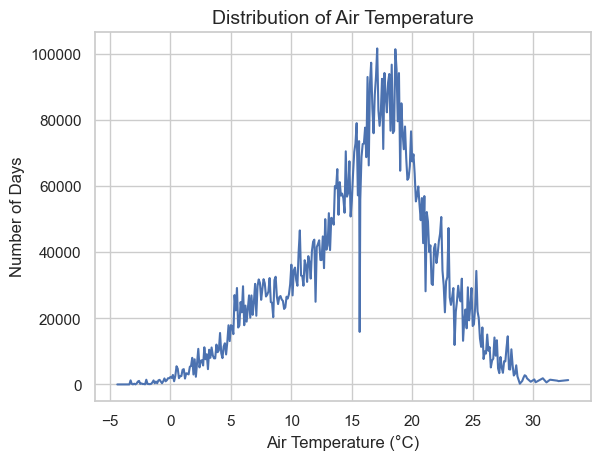

In [135]:
merged_df.groupby(['air_temperature_(degc)_x'])['day'].count().plot()
plt.xlabel('Air Temperature (°C)', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.title('Distribution of Air Temperature', fontsize=14)

### Categorizing distance groups

In [131]:
def distance(m):
    if m <= 1000:
        return 0
    elif 1000 < m <=2000:
        return 1
    elif 2000 < m <=3000:
        return 2
    elif 3000 < m <=4000:
        return 3
    elif 4000 < m <= 5000:
        return 4
    else:
        return 5

In [132]:
merged_df['dist_label']=merged_df['distance_(m)'].apply(distance)

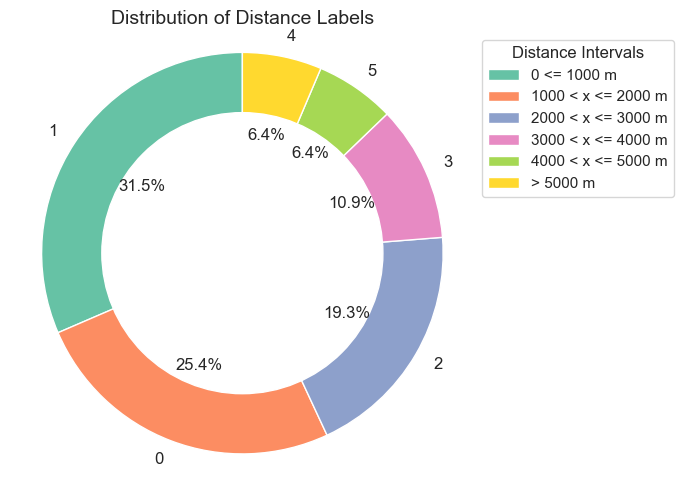

In [153]:
import matplotlib.pyplot as plt

# Custom colors for each distance interval
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Create a figure and axes
plt.figure(figsize=(7, 5))
ax = plt.subplot()

# Group the data and calculate value counts for each 'dist_label'
value_counts = merged_df['dist_label'].value_counts()

# Create the pie chart with custom colors
wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", startangle=90,
                                  colors=custom_colors, wedgeprops={'edgecolor': 'white'})

# Adjust font size of labels and autopct
for text in texts + autotexts:
    text.set_fontsize(12)

# Adding a circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie chart is circular.
ax.axis('equal')

# Adding title
plt.title('Distribution of Distance Labels', fontsize=14)

# Defining the legend labels based on the distance function
legend_labels = ['0 <= 1000 m', '1000 < x <= 2000 m', '2000 < x <= 3000 m', '3000 < x <= 4000 m',
                 '4000 < x <= 5000 m', '> 5000 m']

# Adding legend on the right side with custom labels
plt.legend(legend_labels, title="Distance Intervals", loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


### More than 50% of trips are up to 2km
### 87% of the trips are between 0 and 4km

In [155]:
def categorize_time_of_day(departure_time):
    hour = int(departure_time.split(':')[0])
    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

merged_df['time_of_day'] = merged_df['departure_time'].apply(categorize_time_of_day)

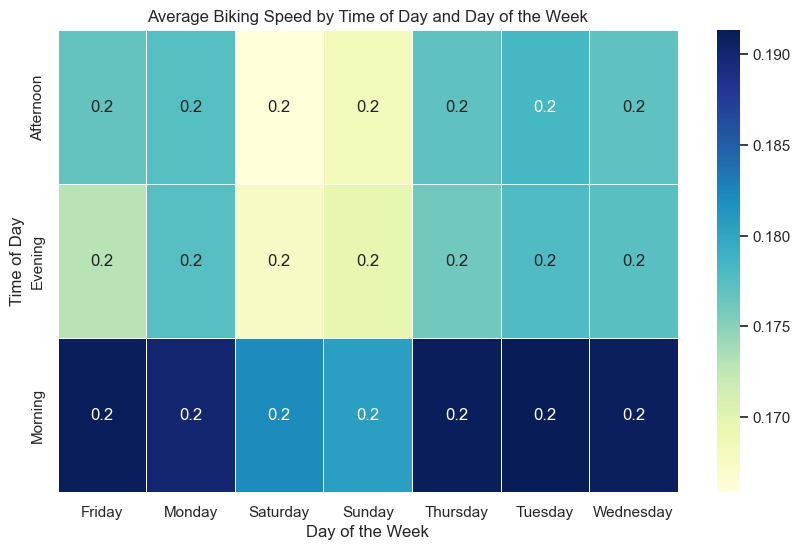

In [156]:
pivot_df = merged_df.pivot_table(index='time_of_day', columns='weekday', values='avg_speed_(km/h)', aggfunc='mean')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)

plt.title('Average Biking Speed by Time of Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')

plt.show()

## Users bike faster during the morning during weekdays

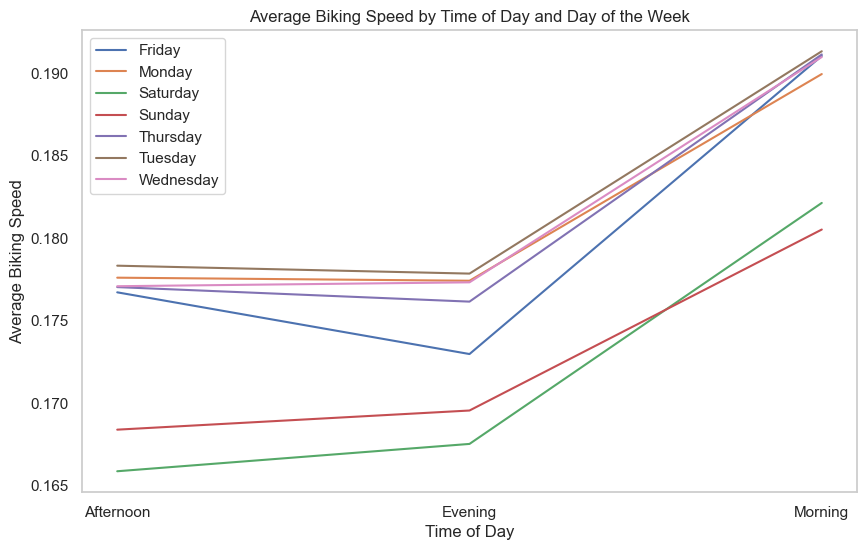

In [157]:
pivot_df = merged_df.pivot_table(index='time_of_day', columns='weekday', values='avg_speed_(km/h)', aggfunc='mean')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a line plot for each day of the week
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], label=day)

plt.title('Average Biking Speed by Time of Day and Day of the Week')
plt.xlabel('Time of Day')
plt.ylabel('Average Biking Speed')
plt.legend()
plt.grid()

plt.show()

## On weekends, the riding speed is slower than on weekdays
### Also, the slower speeds are during weekends during the afternoon

## From where to where?

In [158]:
itinerary = merged_df.groupby(['departure_name','return_name'])['distance_(m)'].agg(['count','mean'])
itinerary

count          mean
departure_name      return_name                             
A.I. Virtasen aukio A.I. Virtasen aukio    495    380.359596
                    Agronominkatu           51   5862.431373
                    Alakiventie              1  10020.000000
                    Annankatu               16   6135.625000
                    Apollonkatu             67   4739.895522
...                                        ...           ...
Ympyrätalo          Vilhonvuorenkatu      1455   1610.545938
                    Voikukantie              1  10941.000000
                    Von Daehnin katu         4  11049.250000
                    Westendinasema           3  12218.000000
                    Ympyrätalo            9862    429.231835

[64775 rows x 2 columns]

In [159]:
top_10 = pd.DataFrame(itinerary.sort_values(by='count',ascending=False).head(10))
top_10

count  \
departure_name                        return_name                                    
Jämeräntaival                         Aalto-yliopisto (M), Korkeakouluaukio  34510   
Aalto-yliopisto (M), Korkeakouluaukio Jämeräntaival                          34156   
Itämerentori                          Itämerentori                           28307   
                                      Salmisaarenranta                       16963   
                                      Tyynenmerenkatu                        16740   
Tyynenmerenkatu                       Itämerentori                           15900   
Gyldenintie                           Itälahdenkatu                          15295   
Itälahdenkatu                         Gyldenintie                            15167   
Salmisaarenranta                      Itämerentori                           12857   
Gyldenintie                           Heikkilänaukio                         12779   

                                                                                    mean  
departure_name                        return_name                                         
Jämeräntaival                         Aalto-yliopisto (M), Korkeakouluaukio   766.953057  
Aalto-yliopisto (M), Korkeakouluaukio Jämeräntaival                           795.230696  
Itämerentori                          Itämerentori                            514.980865  
                                      Salmisaarenranta                        915.539370  
                                      Tyynenmerenkatu                        1163.817404  
Tyynenmerenkatu                       Itämerentori                           1134.066979  
Gyldenintie                           Itälahdenkatu                          1092.466339  
Itälahdenkatu                         Gyldenintie                            1066.258390  
Salmisaarenranta                      Itämerentori                            918.350780  
Gyldenintie                           Heikkilänaukio                          720.270992

In [160]:
top_10 = top_10.reset_index(drop=False)
top_10

,departure_name,return_name,count,mean
0,Jämeräntaival,"Aalto-yliopisto (M), Korkeakouluaukio",34510,766.953057
1,"Aalto-yliopisto (M), Korkeakouluaukio",Jämeräntaival,34156,795.230696
2,Itämerentori,Itämerentori,28307,514.980865
3,Itämerentori,Salmisaarenranta,16963,915.539370
4,Itämerentori,Tyynenmerenkatu,16740,1163.817404
5,Tyynenmerenkatu,Itämerentori,15900,1134.066979
6,Gyldenintie,Itälahdenkatu,15295,1092.466339
7,Itälahdenkatu,Gyldenintie,15167,1066.258390
8,Salmisaarenranta,Itämerentori,12857,918.350780
9,Gyldenintie,Heikkilänaukio,12779,720.270992


In [ ]:
bike_df = merged_df.copy()

In [ ]:
bike_df['year'] = bike_df['date_combined'].dt.year
bike_df['month'] = bike_df['date_combined'].dt.month

# Group by year and month, and count the number of trips in each group
trips_per_month = bike_df.groupby(['year', 'month']).size().reset_index(name='trips_count')

# Group by year and count the number of trips in each year
trips_per_year = bike_df.groupby('year').size().reset_index(name='trips_count_year')

# Merge the summarized data back into the original DataFrame
bike_df = bike_df.merge(trips_per_month, on=['year', 'month'], how='left')
bike_df = bike_df.merge(trips_per_year, on='year', how='left')

bike_df

In [ ]:
bike_df['trips_count_x'].unique()

In [ ]:
target_month = 4

filtered_data = bike_df[bike_df['month'] == target_month]

filtered_data
